In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv(r"C:\Users\hp\Documents\Predictive Maintenance\data\train.csv")

In [3]:
df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.027684,0.0,1.643168,0.0,0.0,0.163003,0.086540,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.022507,0.0,1.516575,0.0,0.0,0.142583,0.093479,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.028242,0.0,1.816590,0.0,0.0,0.137113,0.116735,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.028081,0.0,1.643168,0.0,0.0,0.138094,0.112731,1,1,2


In [4]:
df.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

In [13]:
x=df.iloc[:,0:26]

<AxesSubplot:>

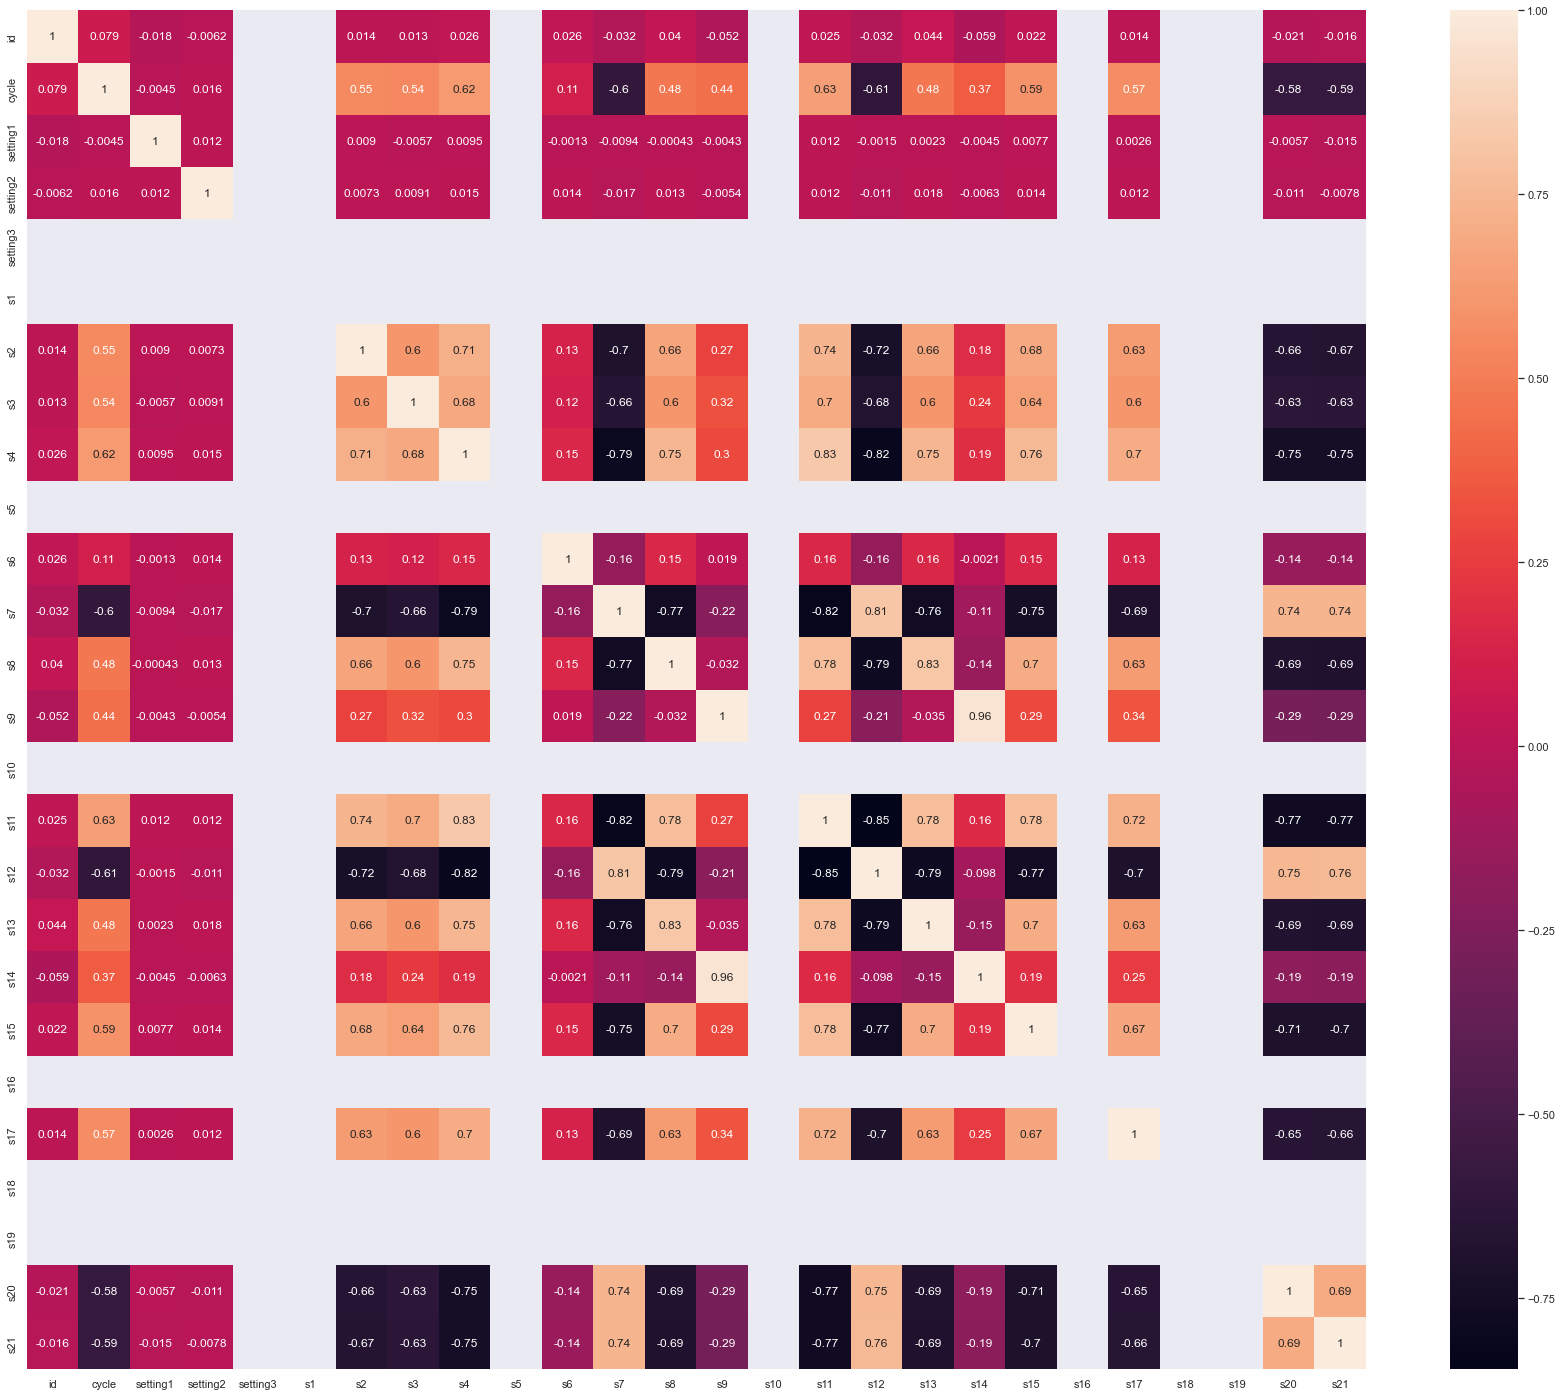

In [16]:
sns.set(rc={'figure.figsize':(30,25)})
sns.heatmap(x.corr(),annot=True)

In [17]:
x=x.drop(['s9','s14'],axis=1)

In [18]:
y=df.ttf

# Gradient Boosting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [22]:
gb=GradientBoostingRegressor()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [25]:
gb.score(x_train,y_train)

0.8847364416945661

In [26]:
gb.score(x_test,y_test)

0.8742090695993625

In [27]:
prediction=gb.predict(x_test)

In [28]:
from sklearn import metrics

In [29]:
MAE=metrics.mean_absolute_error(y_test, prediction)
MSE=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(MSE)

In [30]:
MAE

18.061146619553913

In [31]:
MSE

578.8029323949136

In [32]:
RMSE

24.058323557449167

# Decision Tree

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [35]:
dt=DecisionTreeRegressor()

In [36]:
dt

DecisionTreeRegressor()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
dt.score(x_train,y_train)

1.0

In [39]:
dt.score(x_test,y_test)

0.9140113099241478

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [43]:
rf=RandomForestRegressor()

In [44]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
rf.score(x_train,y_train)

0.9918684236364853

In [46]:
rf.score(x_test,y_test)

0.9387844896516712

In [47]:
prediction=rf.predict(x_test)

In [48]:
MAE=metrics.mean_absolute_error(y_test, prediction)
MSE=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(MSE)

In [49]:
MAE

12.011747031742185

In [50]:
MSE

281.67147492125036

In [51]:
RMSE

16.783071081338193